In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split
import seaborn as sns

In [6]:
df = pd.read_csv('/content/train.csv', usecols=['Age','Fare','Survived'])

In [7]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
df.isnull().mean()*100

,0
Survived,0.00000
Age,19.86532
Fare,0.00000


In [9]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [11]:
x_train['Age_imputed'] = x_train['Age']
x_test['Age_imputed'] = x_test['Age']

In [12]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
x_test['Age_imputed'][x_test['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

/tmp/ipython-input-547872810.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
/tmp/ipython-input-547872810.py:2

In [13]:
x_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,37.0
493,71.0,49.5042,71.0
527,NaN,221.7792,54.0


/tmp/ipython-input-997870149.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label='Original',hist=False,color='c')
/tmp/ipython-input-997870149.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age_imputed'],label = 'Imputed',hist=False,color='pin

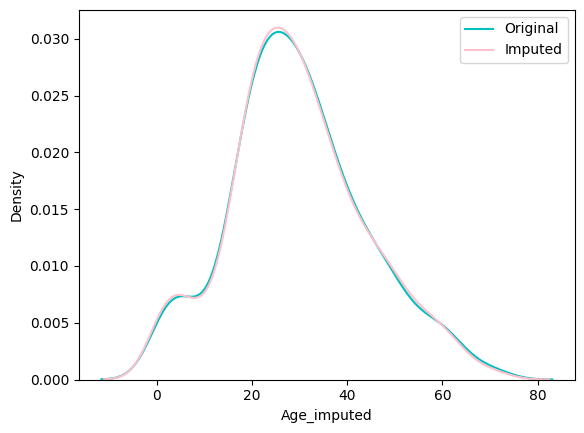

In [14]:
sns.distplot(x_train['Age'],label='Original',hist=False,color='c')
sns.distplot(x_train['Age_imputed'],label = 'Imputed',hist=False,color='pink')

plt.legend()
plt.show()

In [15]:
print('Original variable variance: ', x_train['Age'].var())
print('Variance after random imputation: ', x_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  203.80222261393985


In [16]:
x_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,79.014226
Age,71.512440,204.349513,204.349513
Age_imputed,79.014226,204.349513,203.802223


<Axes: >

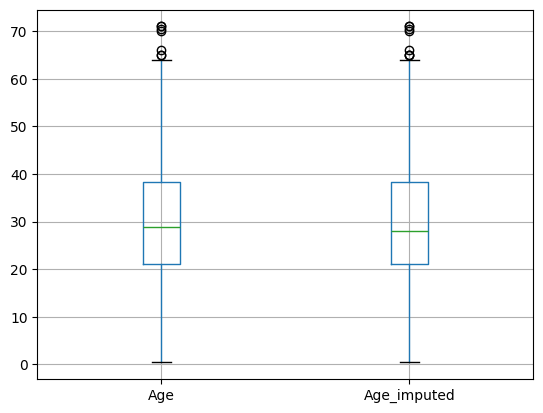

In [17]:
x_train[['Age', 'Age_imputed']].boxplot()

In [18]:
sampled_value = x_train['Age'].dropna().sample(1, random_state=42)

In [19]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [20]:
data.isnull().mean()*100

,FireplaceQu,GarageQual,SalePrice
0,True,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1455,False,False,False
1456,False,False,False
1457,False,False,False
1458,True,False,False


In [22]:
x = data
y = data['SalePrice']

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [27]:
x_train['GarageQual_imputed'] = x_train['GarageQual']
x_test['GarageQual_imputed'] = x_test['GarageQual']

x_train['FireplaceQu_imputed'] = x_train['FireplaceQu']
x_test['FireplaceQu_imputed'] = x_test['FireplaceQu']

In [29]:
x_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1219,NaN,NaN,91500,NaN,NaN
156,NaN,TA,109500,TA,NaN
1049,NaN,TA,84900,TA,NaN
747,Gd,TA,265979,TA,Gd
340,NaN,TA,202900,TA,NaN


In [30]:
x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values
x_test['GarageQual_imputed'][x_test['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_test['GarageQual'].isnull().sum()).values

x_train['FireplaceQu_imputed'][x_train['FireplaceQu_imputed'].isnull()] = x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu'].isnull().sum()).values
x_test['FireplaceQu_imputed'][x_test['FireplaceQu_imputed'].isnull()] = x_train['FireplaceQu'].dropna().sample(x_test['FireplaceQu'].isnull().sum()).values

/tmp/ipython-input-4277669966.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values
/tmp

In [31]:
temp = pd.concat(
        [
            x_train['GarageQual'].value_counts() / len(x_train['GarageQual'].dropna()),
            x_train['GarageQual_imputed'].value_counts() / len(x_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [33]:
temp

,original,imputed
TA,0.951043,0.952055
Fa,0.037171,0.036815
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [34]:
temp = pd.concat(
        [
            x_train['FireplaceQu'].value_counts() / len(x_train['FireplaceQu'].dropna()),
            x_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.647587
TA,0.412439,0.539843
Fa,0.040917,0.054994
Po,0.027823,0.034792
Ex,0.024550,0.033670


/tmp/ipython-input-2578983325.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
/tmp/ipython-input-2578983325.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu']

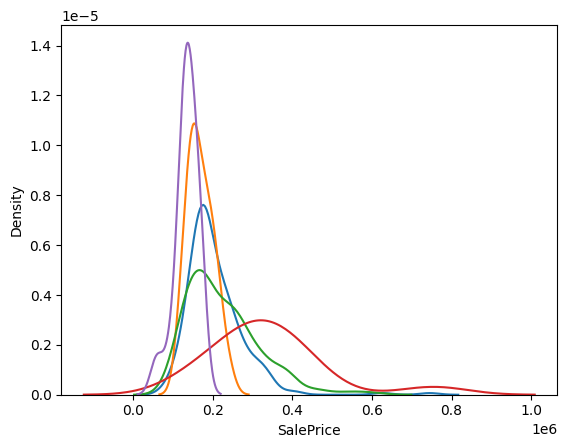

In [35]:
for category in x_train['FireplaceQu'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

/tmp/ipython-input-484091634.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
/tmp/ipython-input-484091634.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['Firepla

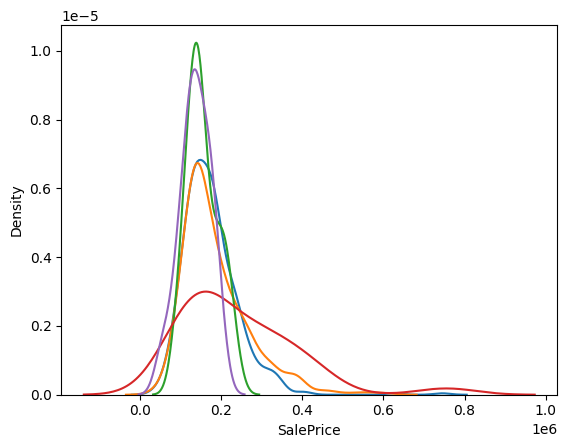

In [36]:
for category in x_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()